# Making Figure 1

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [44]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults, add_units
ps_defaults(use_tex=False, dpi=150)

In [4]:
from src.constants import ERSSTV5_PATH, NOAA_DATA_PATH, cmip6_ensemble_var
from src.plot_utils import label_subplots
from src.xr_utils import can_coords, sel, get_trend

In [5]:
ts_ensemble = sel(can_coords(xr.open_mfdataset(cmip6_ensemble_var("ts") + "/*.nc")).ts, reg="pac")

warning, not changing:  member


In [28]:
def get_trends(da: xr.DataArray, beginning=2007, finish=2017) -> xr.Dataset:
    da_tr_list = []
    for start, end in [(str(x - 59), str(x)) for x in range(beginning, finish+1)]:
        da_tr_list.append(
            get_trend(da.sel(T=slice(start, end))).expand_dims({"end_year": [int(end)]})
        )
    da_tr = xr.merge(da_tr_list)
    da_tr.attrs["units"] = "K"
    da_tr.attrs["long_name"] = "Trend over 60 years up to end year"
    return da_tr

In [29]:
# da_tr_ensemble = get_trends(ts_ensemble)

In [30]:
ts_tr_mean = get_trends(ts_ensemble.mean("member"), beginning=2016, finish=2017).compute()

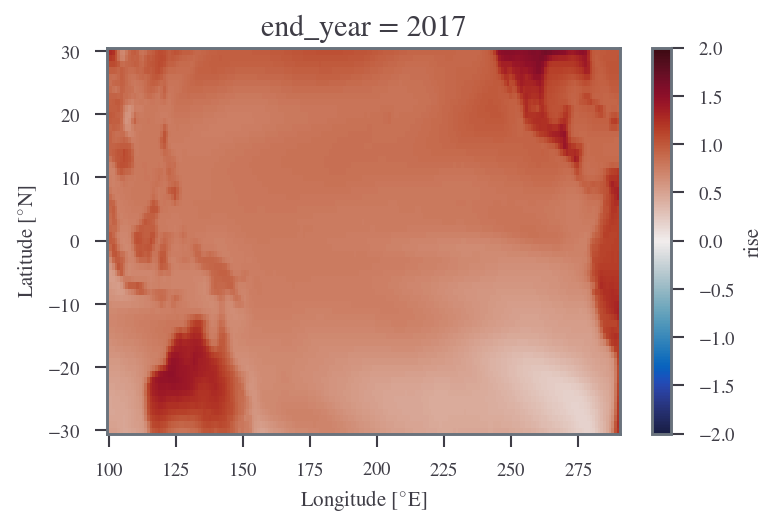

In [31]:
ts_tr_mean.isel(end_year=1).rise.plot(cmap="cmo.balance", vmin=-2, vmax=2)

In [37]:
rh_mmm = sel(
    can_coords(xr.open_mfdataset(cmip6_ensemble_var("hur") + "/*.nc")).hur, reg="pac"
).sel(T=slice("1958", "2017")).mean("T").mean("member").compute()

warning, not changing:  member


/home/users/sithom/seager19/env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
sfcWind_mmm = sel(
    can_coords(xr.open_mfdataset(cmip6_ensemble_var("rh") + "/*.nc")).ts, reg="pac"
).sel(T=slice("1958", "2017"))

No handles with labels found to put in legend.


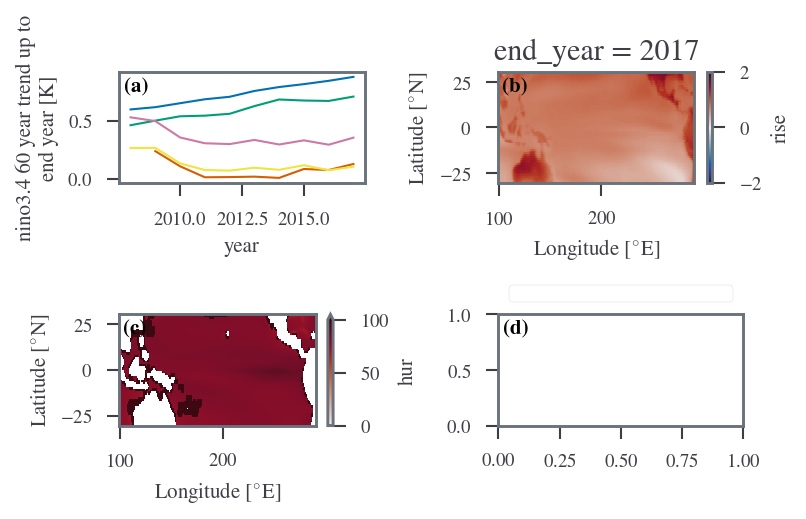

In [45]:
fig, axs = plt.subplots(2, 2)
da = xr.open_dataarray("temp.nc")
da.plot.line(ax=axs[0,0], hue="source")
da_tr_mean.isel(end_year=1).rise.plot(ax=axs[0,1], cmap="cmo.balance", vmin=-2, vmax=2)
add_units(rh_mmm).plot(ax=axs[1,0], cmap="cmo.amp", vmin=0, vmax=100)
axs[0,0].get_legend().remove()
label_subplots(axs)
plt.legend(
    bbox_to_anchor=(-0, 1.02, 1, 0.102),
    loc="lower left",
    mode="expand",
    ncol=2,
)
plt.tight_layout()

In [40]:
rh_mmm

<xarray.DataArray 'hur' (Y: 61, X: 191)>
array([[76.40787 , 76.27606 , 76.13373 , ...,       inf,       inf,
              inf],
       [76.01028 , 75.87965 , 75.7559  , ...,       inf,       inf,
              inf],
       [75.722725, 75.60333 , 75.50637 , ...,       inf,       inf,
              inf],
       ...,
       [      inf,       inf,       inf, ..., 78.12672 , 78.395584,
        78.58054 ],
       [      inf,       inf,       inf, ..., 77.77023 , 78.08242 ,
        78.32322 ],
       [      inf,       inf,       inf, ..., 77.2506  , 77.60309 ,
        77.90891 ]], dtype=float32)
Coordinates:
    lat      (Y, X) float64 -30.0 -30.0 -30.0 -30.0 ... 30.0 30.0 30.0 30.0
  * X        (X) int64 100 101 102 103 104 105 106 ... 285 286 287 288 289 290
  * Y        (Y) int64 -30 -29 -28 -27 -26 -25 -24 -23 ... 24 25 26 27 28 29 30